# **Catatan**

- Kode program 1 adalah kalian tinggal running kode ini agar dapat melihat training dengan data asli tanpa dibersihkan, kemudian dievaluasi hasilnya dan dicatat. (running sendiri ya, kalau ada error screenshot kirim ke wa saya)
- hasil training dengan data asli (classification non-tuning) dibandingkan dengan hasil training data asli menggunakan hyperparameter tuning
- metric evaluasinya harus ada accuracy, precision, recall, dan f1-score

Kode ini untuk Topik ini:
- Ransomware Detection Using Transformer
Topik Riset 1:
"Studi Transformer-Based Sequence Modelling untuk Deteksi Ransomware Melalui Analisis Trafik Jaringan yang Mengenkripsi Secara Tiba-tiba"
Deskripsi:
Model Transformer dilatih untuk mendeteksi pola enkripsi yang tiba-tiba dalam trafik jaringan. Dengan memanfaatkan arsitektur Transformer, model dapat mengenali urutan paket data yang menunjukkan aktivitas enkripsi ransomware secara dini sebelum terjadi dampak serius.
Novelty: Tinggi. Penggunaan Transformer untuk mendeteksi pola enkripsi ransomware yang tiba-tiba dalam trafik jaringan belum banyak dieksplorasi secara spesifik. Transformer memiliki kemampuan menangani urutan data panjang dan deteksi pola, sehingga bisa menghadirkan pendekatan baru dalam prediksi serangan ransomware.
Dataset: UNSW-NB15 Dataset
Dataset ini mencakup trafik yang mencakup berbagai serangan jaringan, termasuk backdoor, yang relevan untuk deteksi ransomware. Model Transformer dapat dilatih menggunakan pola trafik berbahaya dari dataset ini untuk mendeteksi aktivitas enkripsi ransomware.
Dataset: UNSW-NB15 Dataset

# **Tolong di running sendiri ya, kalau ada error tanyakan dahalu melalui chatgpt ya**

# **Importing Modules and Libraries**

In [2]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# **Importing Datasets**

Mount Google Drive:

Digunakan untuk mengakses file yang disimpan di Google Drive.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!ls


Mounted at /content/gdrive
gdrive	sample_data


Mengubah direktori kerja:

Ini digunakan untuk berpindah ke folder tempat dataset Anda berada.

In [4]:
import os
os.chdir("/content/gdrive/MyDrive/Android-Ransomeware")
!ls


Android_Ransomeware.csv  model_best_fold_1.pt  model_best_fold_2.pt


Memuat dataset:

Dataset UNSW_NB15.csv dimuat ke dalam variabel data.

In [5]:
data = pd.read_csv('/content/gdrive/MyDrive/Android-Ransomeware/Android_Ransomeware.csv')


Menampilkan informasi awal tentang data:

Menampilkan 5 baris pertama dari dataset dan informasi tentang tipe data, jumlah entri, dan kolom yang ada di dalam dataset.

In [6]:
data.head(n=5)


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,151054,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,349,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,172.217.12.174-10.42.0.211-443-34259-6,10.42.0.211,34259,172.217.12.174,443,6,16/06/2017 03:55:52,119,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,172.217.10.74-10.42.0.211-443-55509-6,10.42.0.211,55509,172.217.10.74,443,6,16/06/2017 03:55:53,37055,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,172.217.2.174-10.42.0.211-443-44852-6,10.42.0.211,44852,172.217.2.174,443,6,16/06/2017 03:55:58,178727,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392034 entries, 0 to 392033
Data columns (total 86 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    392034 non-null  int64  
 1   Flow ID                       392034 non-null  object 
 2    Source IP                    392034 non-null  object 
 3    Source Port                  392034 non-null  int64  
 4    Destination IP               392034 non-null  object 
 5    Destination Port             392034 non-null  int64  
 6    Protocol                     392034 non-null  int64  
 7    Timestamp                    392034 non-null  object 
 8    Flow Duration                392034 non-null  int64  
 9    Total Fwd Packets            392034 non-null  int64  
 10   Total Backward Packets       392034 non-null  int64  
 11  Total Length of Fwd Packets   392034 non-null  float64
 12   Total Length of Bwd Packets  392034 non-nul

In [8]:
data.shape


(392034, 86)

Ini adalah proses atau tahapan persiapan data yang baik sebelum dilanjutkan ke tahap analisis atau pemodelan.

# **Data Visualization**

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.savefig('/content/gdrive/My Drive/ASDOS/template/Topik1_Studi Transformer-Based Sequence Modelling untuk Deteksi Ransomware Melalui Analisis Trafik Jaringan yang Mengenkripsi Secara Tiba-tiba/plot/Pie_chart_binary2.png')
plt.show()


AttributeError: 'DataFrame' object has no attribute 'label'

<Figure size 800x800 with 0 Axes>

# **Label Encoding**

In [9]:
data['Label'].value_counts()

,count
Label,
SVpeng,54161
PornDroid,46082
Koler,44555
Benign,43091
RansomBO,39859
Charger,39551
Simplocker,36340
WannaLocker,32701
Jisut,25672


In [10]:
# Label Encoding
bin_label = pd.DataFrame(data["Label"].map(lambda x:'normal' if x=="Benign" else 'abnormal'))

bin_data = data.copy()
bin_data["Label"] = bin_label

le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data["Label"] = enc_label

le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [11]:
# **DATA SPLITTING**

# 1. Mengimpor Modul yang Diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


X_bin = bin_data.drop(columns=['Label'],axis=1)
y_bin = bin_data['Label']

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=50)


# **DATA SPLITTING**

# 1. Mengimpor Modul yang Diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


X_bin = bin_data.drop(columns=['Label'],axis=1)
y_bin = bin_data['Label']

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=50)


# **LIBRARY TRANSFORMER**

# **1. TRANSFORMER "ENCODER" Label tidak biner**

Instalasi Paket yang Diperlukan

Instalasi paket: Menginstal berbagai paket yang diperlukan untuk pembelajaran mesin dan pemrosesan data.

In [ ]:
!pip install transformers tensorflow scikit-learn matplotlib pandas


## Non-tuning

Streaming output truncated to the last 5000 lines.
Label '31/08/2017 02:54:20' di-encode menjadi 77579
Label '31/08/2017 02:54:23' di-encode menjadi 77580
Label '31/08/2017 02:54:53' di-encode menjadi 77581
Label '31/08/2017 02:54:56' di-encode menjadi 77582
Label '31/08/2017 02:55:03' di-encode menjadi 77583
Label '31/08/2017 02:55:21' di-encode menjadi 77584
Label '31/08/2017 02:55:22' di-encode menjadi 77585
Label '31/08/2017 02:55:23' di-encode menjadi 77586
Label '31/08/2017 02:55:24' di-encode menjadi 77587
Label '31/08/2017 02:55:28' di-encode menjadi 77588
Label '31/08/2017 02:55:29' di-encode menjadi 77589
Label '31/08/2017 02:55:35' di-encode menjadi 77590
Label '31/08/2017 02:55:38' di-encode menjadi 77591
Label '31/08/2017 02:55:51' di-encode menjadi 77592
Label '31/08/2017 02:56:01' di-encode menjadi 77593
Label '31/08/2017 02:56:08' di-encode menjadi 77594
Label '31/08/2017 02:56:18' di-encode menjadi 77595
Label '31/08/2017 02:56:23' di-encode menjadi 77596
Label '31/08/

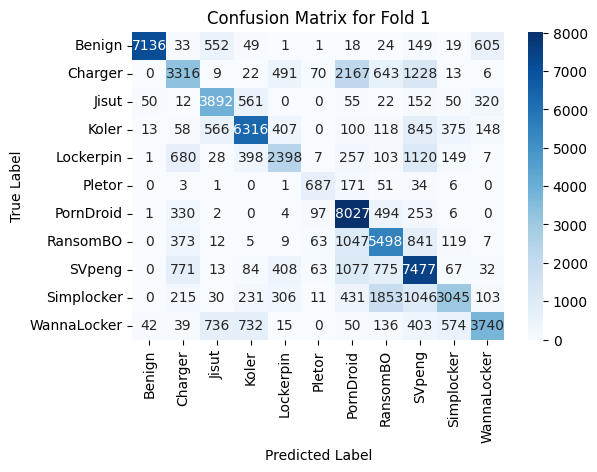

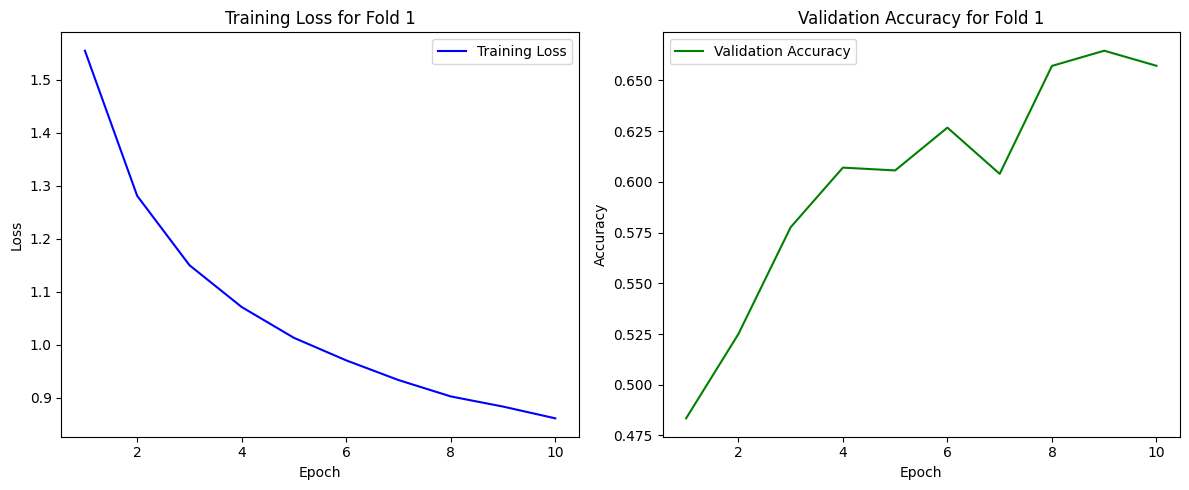


Fold 2
Epoch 1/10 - Loss: 1.5620 - Validation Accuracy: 0.4645
Epoch 2/10 - Loss: 1.2990 - Validation Accuracy: 0.5410
Epoch 3/10 - Loss: 1.1722 - Validation Accuracy: 0.5816
Epoch 4/10 - Loss: 1.0817 - Validation Accuracy: 0.5578
Epoch 5/10 - Loss: 1.0165 - Validation Accuracy: 0.6097
Epoch 6/10 - Loss: 0.9740 - Validation Accuracy: 0.6280
Epoch 7/10 - Loss: 0.9382 - Validation Accuracy: 0.6414
Epoch 8/10 - Loss: 0.9089 - Validation Accuracy: 0.6255
Epoch 9/10 - Loss: 0.8854 - Validation Accuracy: 0.6674
Epoch 10/10 - Loss: 0.8606 - Validation Accuracy: 0.6589
Accuracy for fold 2: 65.89%
F1 Score for fold 2: 0.6497
Confusion Matrix:
[[7996    0  178   12    1    1    0    2   43    1  368]
 [  23 4451   20  100  129   65 1777   78 1225   15   10]
 [ 593    0 3307  676    3    0    1    1   63   18  399]
 [ 191   51  394 7009  201    0    5    1  553  229  163]
 [  71  979   25  740 1722    1   95   10 1286  193    9]
 [   0   41    0    1    4  689  150   41   28    0    0]
 [   3  7

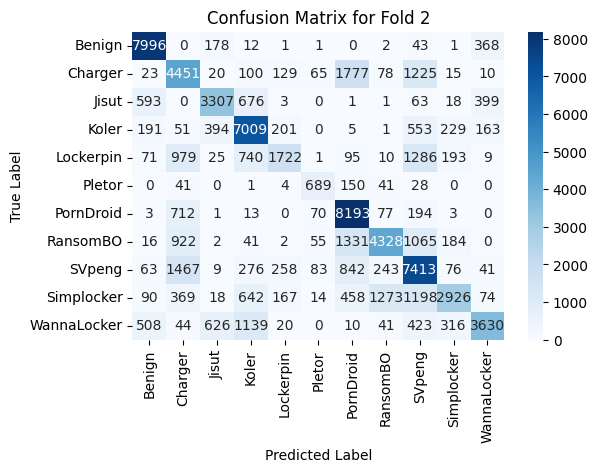

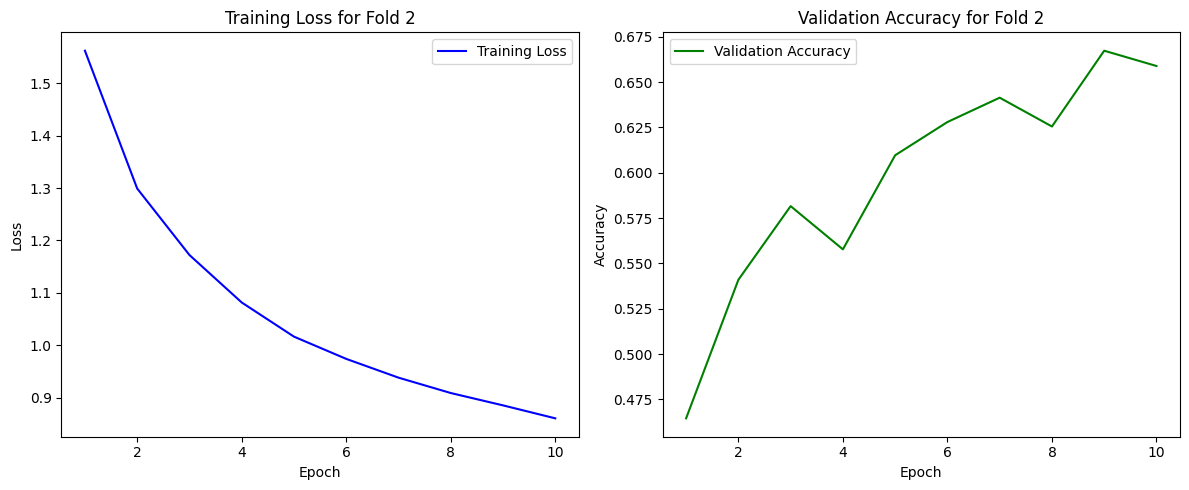


Fold 3
Epoch 1/10 - Loss: 1.5593 - Validation Accuracy: 0.4840
Epoch 2/10 - Loss: 1.2973 - Validation Accuracy: 0.5222
Epoch 3/10 - Loss: 1.1764 - Validation Accuracy: 0.5618
Epoch 4/10 - Loss: 1.0890 - Validation Accuracy: 0.5849
Epoch 5/10 - Loss: 1.0269 - Validation Accuracy: 0.6127
Epoch 6/10 - Loss: 0.9814 - Validation Accuracy: 0.6531
Epoch 7/10 - Loss: 0.9448 - Validation Accuracy: 0.6379
Epoch 8/10 - Loss: 0.9155 - Validation Accuracy: 0.6657
Epoch 9/10 - Loss: 0.8908 - Validation Accuracy: 0.6688
Epoch 10/10 - Loss: 0.8676 - Validation Accuracy: 0.6928
Accuracy for fold 3: 69.28%
F1 Score for fold 3: 0.6869
Confusion Matrix:
[[8217    2  145  132    4    0    1    1    1    2  110]
 [   3 3576    0    6  252   21 1891  670 1486    8    3]
 [ 516   26 3878  311   24    1    3    0   14   18  382]
 [  69   89  705 6064  457    1   24    4  548  341  541]
 [   8  742    4  264 2457    5  111   20 1165  232   22]
 [   0   12    0    0    0  538  196   68  105    5    0]
 [   1  2

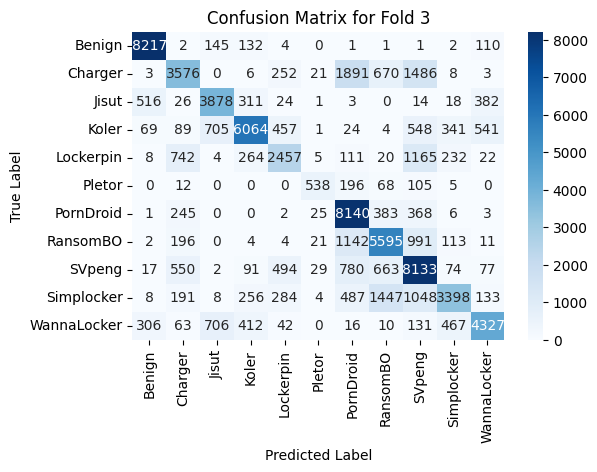

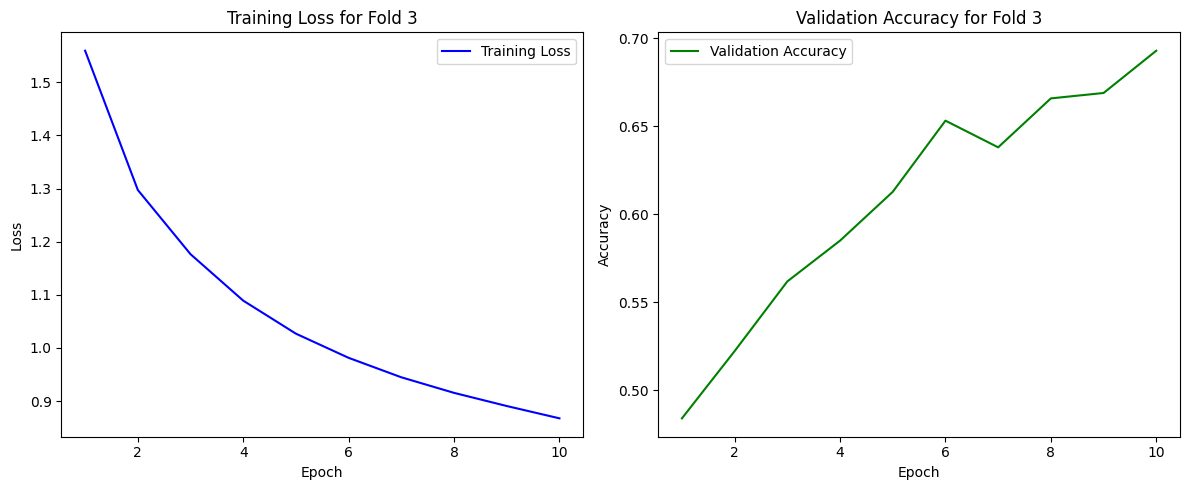


Fold 4
Epoch 1/10 - Loss: 1.5731 - Validation Accuracy: 0.4705
Epoch 2/10 - Loss: 1.3049 - Validation Accuracy: 0.5021
Epoch 3/10 - Loss: 1.1702 - Validation Accuracy: 0.5600
Epoch 4/10 - Loss: 1.0844 - Validation Accuracy: 0.5916
Epoch 5/10 - Loss: 1.0244 - Validation Accuracy: 0.6484
Epoch 6/10 - Loss: 0.9803 - Validation Accuracy: 0.6468
Epoch 7/10 - Loss: 0.9460 - Validation Accuracy: 0.6439
Epoch 8/10 - Loss: 0.9159 - Validation Accuracy: 0.6704
Epoch 9/10 - Loss: 0.8894 - Validation Accuracy: 0.6545
Epoch 10/10 - Loss: 0.8664 - Validation Accuracy: 0.6474
Accuracy for fold 4: 64.74%
F1 Score for fold 4: 0.6408
Confusion Matrix:
[[8414    0  185    1    1    0    2    0    0    0   20]
 [  53 3405   21  169  676   29  970  820 1587   35   38]
 [ 962    0 3461  193    1    0    0    0    1    2  579]
 [ 325   25  813 6208  387    0    0    0  203  324  646]
 [ 115  441   27  817 2335    0   25   57  904  248   71]
 [  12   13    0    5    1  591  110   87   95    7    3]
 [  21 10

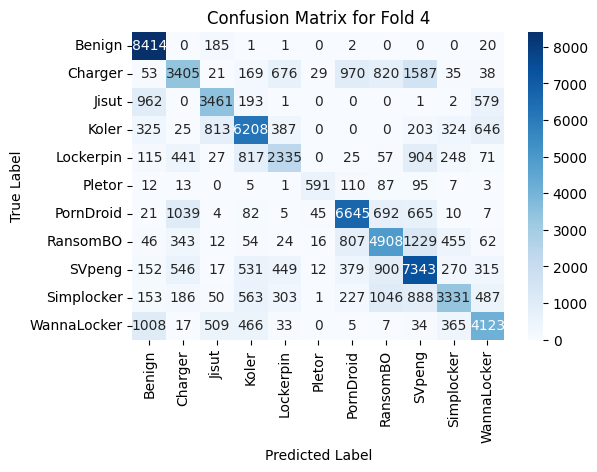

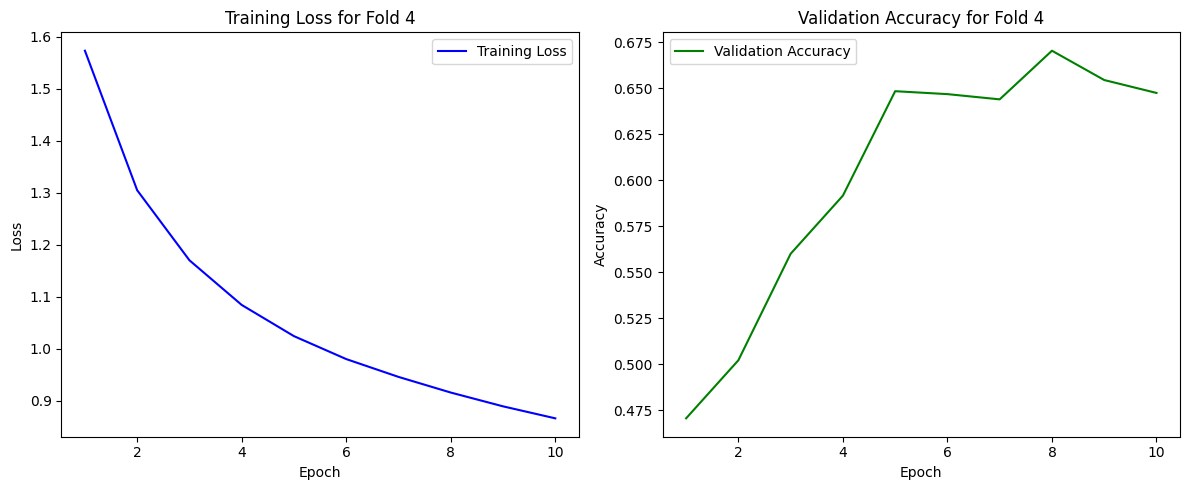


Fold 5
Epoch 1/10 - Loss: 1.5594 - Validation Accuracy: 0.4732
Epoch 2/10 - Loss: 1.2973 - Validation Accuracy: 0.5405
Epoch 3/10 - Loss: 1.1656 - Validation Accuracy: 0.5794
Epoch 4/10 - Loss: 1.0823 - Validation Accuracy: 0.5888
Epoch 5/10 - Loss: 1.0200 - Validation Accuracy: 0.6174
Epoch 6/10 - Loss: 0.9733 - Validation Accuracy: 0.6231
Epoch 7/10 - Loss: 0.9352 - Validation Accuracy: 0.6154
Epoch 8/10 - Loss: 0.9078 - Validation Accuracy: 0.6655
Epoch 9/10 - Loss: 0.8818 - Validation Accuracy: 0.6768
Epoch 10/10 - Loss: 0.8607 - Validation Accuracy: 0.6741
Accuracy for fold 5: 67.41%
F1 Score for fold 5: 0.6717
Confusion Matrix:
[[7734    3  225  133    0    0    0    0   19  219  331]
 [   0 3764    1   22  290   25 1869  861 1086   45   11]
 [ 365   39 3484  495    4    0    2   15   41  156  524]
 [  38   71  514 6545  491    0   53  158  281  443  444]
 [   3  878    0  398 2425    1  125  178  671  260   19]
 [   0   26    0    0    1  638  143  101   47    3    0]
 [   0  2

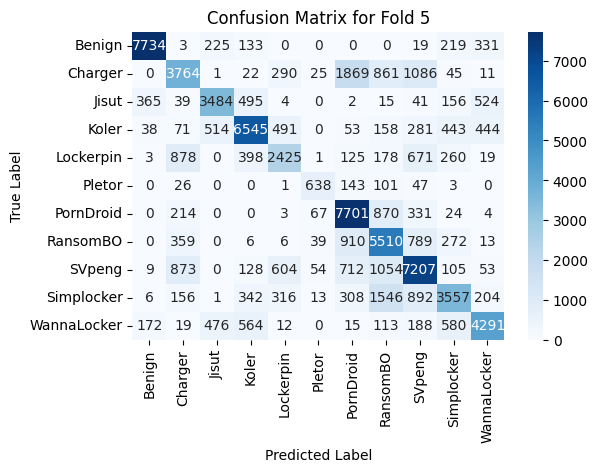

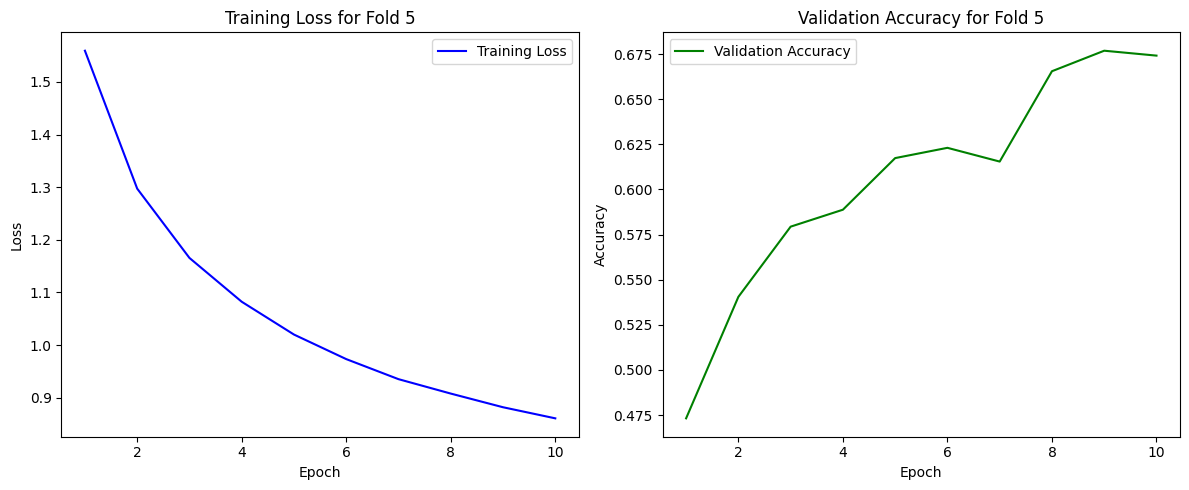


Average Accuracy: 66.61%
Average F1 Score: 0.6605


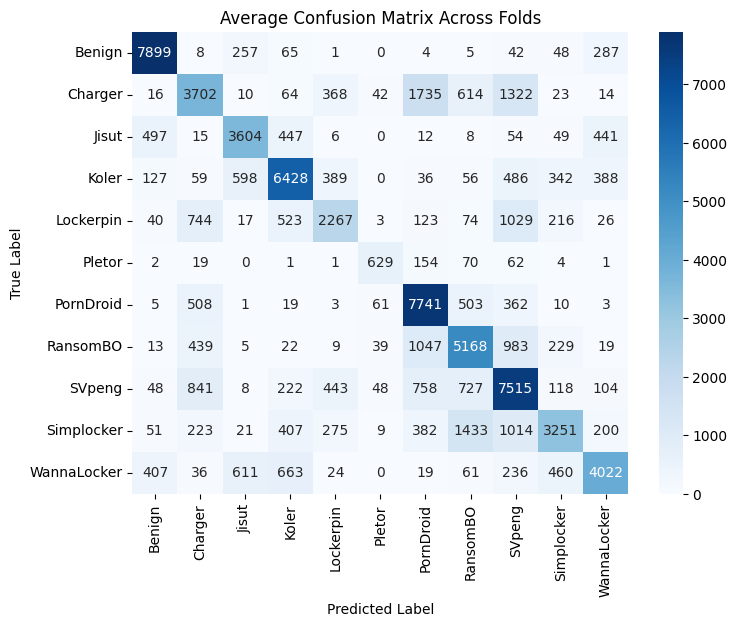

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import KFold
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Meninjau distribusi semua kolom sebelum encoding
print("Distribusi sebelum encoding:")
for col in data.select_dtypes(include=['object']):
    print(f"Kolom: {col}")
    print(data[col].value_counts())
    print("\n")

# 2. Label encoding untuk semua kolom bertipe 'object'
label_encoder = LabelEncoder()
original_labels = {}
encoded_labels = {}

for col in data.select_dtypes(include=['object']).columns:
    original_labels[col] = data[col].unique()
    data[col] = label_encoder.fit_transform(data[col])
    encoded_labels[col] = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# 3. Memastikan hasil encoding
print("Distribusi setelah encoding:")
print(data.head())

# Menampilkan mapping label
print("\nMapping label asli ke encoded:")
for col, mapping in encoded_labels.items():
    print(f"\nKolom: {col}")
    for original, encoded in mapping.items():
        print(f"Label '{original}' di-encode menjadi {encoded}")

# 4. Menentukan fitur dan target
X = data.drop('Label', axis=1)  # 'Label' adalah target
y = data['Label']

# 5. KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_accuracy = []
all_f1_scores = []
conf_matrix_list = []

# Definisikan Transformer model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2, dropout=0.1):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)

# 6. Loop untuk cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X)):
    print(f'\nFold {fold + 1}')

    # Split data menjadi training dan validation set
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train.values)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val.values)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader with larger batch size
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Initialize the model
    model = TransformerModel(input_dim=X_train_tensor.shape[1], num_classes=len(np.unique(y)))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Lists for tracking metrics
    train_losses = []
    val_accuracies = []

    # Train the model
    num_epochs = 10  # Mengurangi epoch untuk demonstrasi
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Calculate average loss and accuracy
        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = correct / total
        train_losses.append(epoch_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        val_accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(val_accuracy)

        # Print loss and accuracy for each epoch
        print(f'Epoch {epoch + 1}/{num_epochs} - Loss: {epoch_loss:.4f} - Validation Accuracy: {val_accuracy:.4f}')

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred.numpy())
    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())

    # Append results for this fold
    all_accuracy.append(accuracy)
    all_f1_scores.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix for current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Plotting Training and Validation Accuracy and Loss
    plt.figure(figsize=(12, 5))

    # Plot Training Loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 7. Average metrics across all folds
print(f'\nAverage Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 8. Plot the average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Average Confusion Matrix Across Folds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **Hyperparameter Tuning**

In [ ]:
import itertools

# Define the hyperparameters grid
param_grid = {
    'lr': [0.001, 0.0005],
    'batch_size': [16, 32],
    'nhead': [2, 4]
}

# Track the best model
best_accuracy = 0
best_params = None

# Get the number of unique classes from y_train (or y)
num_classes = len(np.unique(y))  # Assuming 'y' is your target variable

# Loop over all combinations of hyperparameters
for lr, batch_size, nhead in itertools.product(param_grid['lr'],
                                               param_grid['batch_size'],
                                               param_grid['nhead']):
    print(f'Training with lr={lr}, batch_size={batch_size}, nhead={nhead}')

    # Reinitialize model with new hyperparameters, ensuring consistent d_model and num_classes
    model = TransformerModel(input_dim=X_train_tensor.shape[1],
                             num_classes=num_classes,  # Use the correct number of classes
                             d_model=128, nhead=nhead, num_layers=3, dropout=0.3)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    # DataLoader with the new batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Train for 2 epochs (for quick demonstration)
    for epoch in range(2):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Validate and calculate accuracy
    model.eval()
    with torch.no_grad():
        y_pred_probs = model(X_val_tensor)
        _, y_pred = torch.max(y_pred_probs, 1)
        accuracy = accuracy_score(y_val, y_pred.numpy())

    print(f'Validation Accuracy: {accuracy * 100:.2f}%')

    # Save best parameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'lr': lr, 'batch_size': batch_size, 'nhead': nhead}

print(f'Best Params: {best_params} with Accuracy: {best_accuracy * 100:.2f}%')

Training with lr=0.001, batch_size=16, nhead=2
Validation Accuracy: 33.24%
Training with lr=0.001, batch_size=16, nhead=4
Validation Accuracy: 32.57%
Training with lr=0.001, batch_size=32, nhead=2
Validation Accuracy: 46.89%
Training with lr=0.001, batch_size=32, nhead=4
Validation Accuracy: 35.61%
Training with lr=0.0005, batch_size=16, nhead=2
Validation Accuracy: 48.09%
Training with lr=0.0005, batch_size=16, nhead=4
Validation Accuracy: 45.35%
Training with lr=0.0005, batch_size=32, nhead=2
Validation Accuracy: 48.32%
Training with lr=0.0005, batch_size=32, nhead=4
Validation Accuracy: 47.08%
Best Params: {'lr': 0.0005, 'batch_size': 32, 'nhead': 2} with Accuracy: 48.32%


# **CLASSIFICATION With Hyperparameter Tuning**
(ganti parameter sesuai yang terbaik hasil hyperparameter tuning ya)

Streaming output truncated to the last 5000 lines.
Label '31/08/2017 02:54:20' di-encode menjadi 77579
Label '31/08/2017 02:54:23' di-encode menjadi 77580
Label '31/08/2017 02:54:53' di-encode menjadi 77581
Label '31/08/2017 02:54:56' di-encode menjadi 77582
Label '31/08/2017 02:55:03' di-encode menjadi 77583
Label '31/08/2017 02:55:21' di-encode menjadi 77584
Label '31/08/2017 02:55:22' di-encode menjadi 77585
Label '31/08/2017 02:55:23' di-encode menjadi 77586
Label '31/08/2017 02:55:24' di-encode menjadi 77587
Label '31/08/2017 02:55:28' di-encode menjadi 77588
Label '31/08/2017 02:55:29' di-encode menjadi 77589
Label '31/08/2017 02:55:35' di-encode menjadi 77590
Label '31/08/2017 02:55:38' di-encode menjadi 77591
Label '31/08/2017 02:55:51' di-encode menjadi 77592
Label '31/08/2017 02:56:01' di-encode menjadi 77593
Label '31/08/2017 02:56:08' di-encode menjadi 77594
Label '31/08/2017 02:56:18' di-encode menjadi 77595
Label '31/08/2017 02:56:23' di-encode menjadi 77596
Label '31/08/

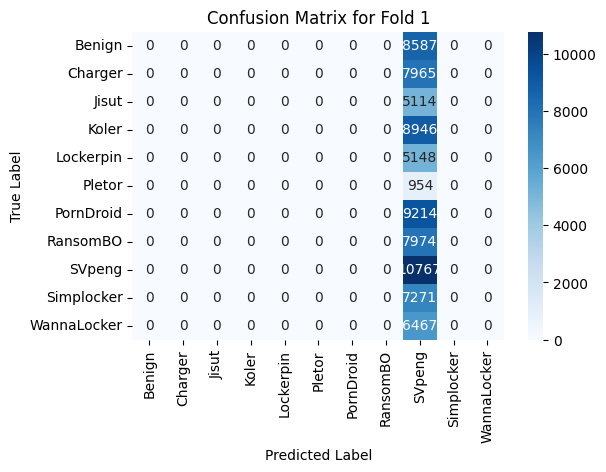

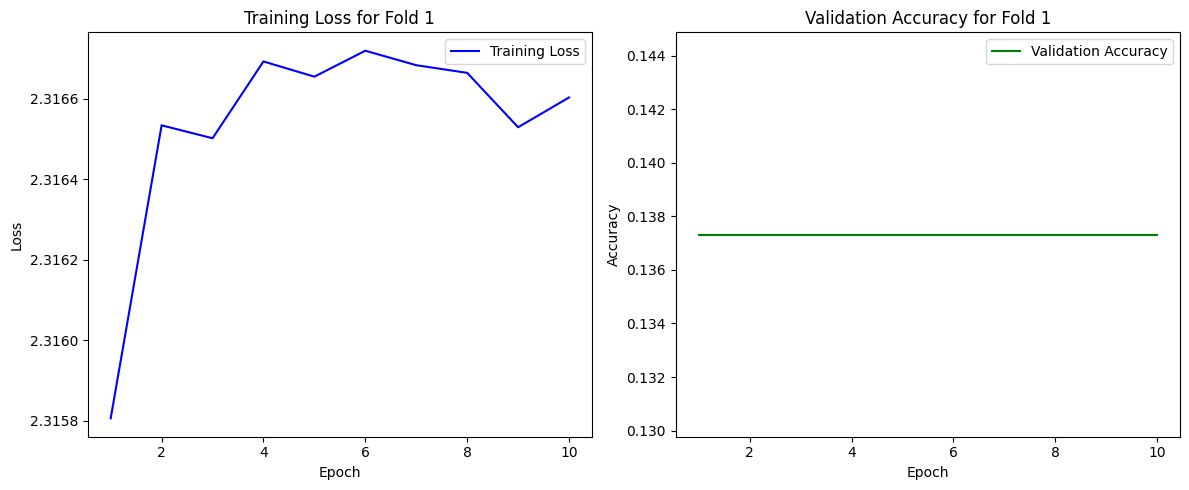


Fold 2
Epoch 1/10 - Loss: 1.9993 - Validation Accuracy: 0.2839
Epoch 2/10 - Loss: 1.9020 - Validation Accuracy: 0.2781
Epoch 3/10 - Loss: 1.8152 - Validation Accuracy: 0.3209
Epoch 4/10 - Loss: 1.7653 - Validation Accuracy: 0.3773
Epoch 5/10 - Loss: 1.6464 - Validation Accuracy: 0.3901
Epoch 6/10 - Loss: 1.6009 - Validation Accuracy: 0.4033
Epoch 7/10 - Loss: 1.4279 - Validation Accuracy: 0.5036
Epoch 8/10 - Loss: 1.3545 - Validation Accuracy: 0.5120
Epoch 9/10 - Loss: 1.3341 - Validation Accuracy: 0.5133
Epoch 10/10 - Loss: 1.2613 - Validation Accuracy: 0.5330
Accuracy for fold 2: 53.30%
F1 Score for fold 2: 0.5151
Confusion Matrix:
[[6871    0  677   57    5    0    0    7  242   28  715]
 [   1 1243    0   30  219   13 2998  836 2294  211   48]
 [ 225    0 3291  744    2    0    2   11  272  101  413]
 [  12   58  744 5615  600    2   56   47 1009  342  312]
 [   3  595    4  548  897   15  441  125 2089  360   54]
 [   0   15    0    0    1  294  382  227   28    1    6]
 [   0  2

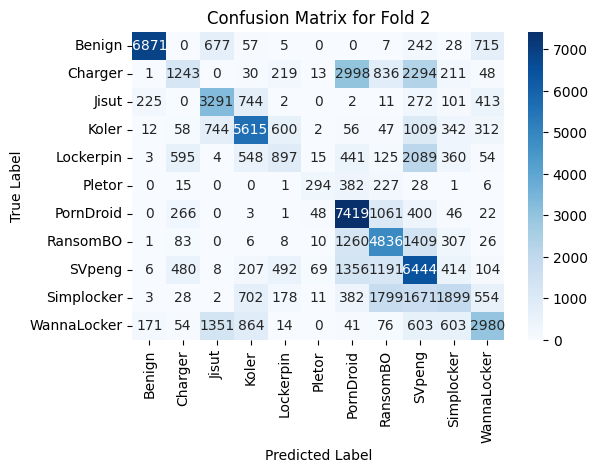

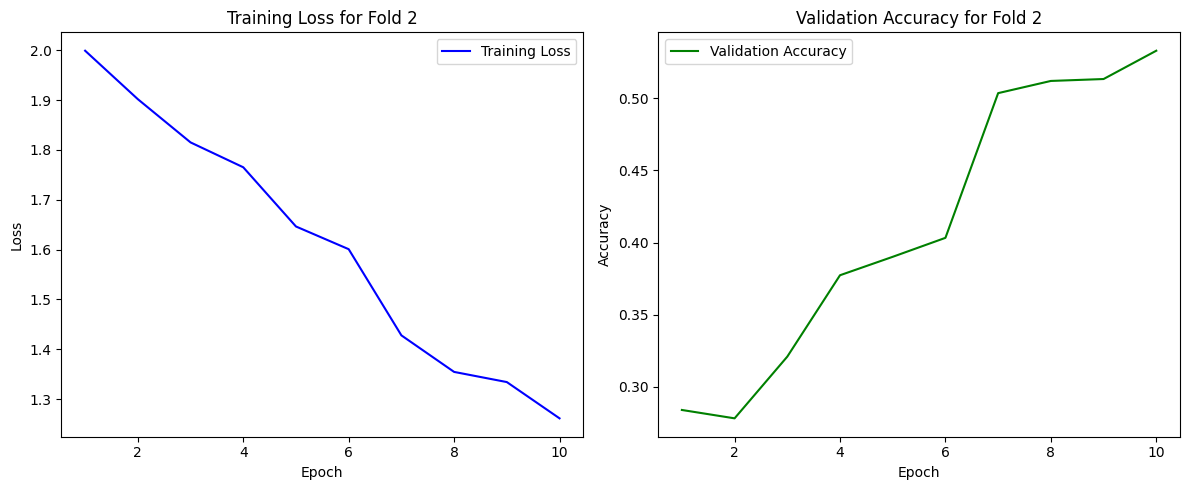


Fold 3
Epoch 1/10 - Loss: 2.0148 - Validation Accuracy: 0.2884
Epoch 2/10 - Loss: 1.8505 - Validation Accuracy: 0.3350
Epoch 3/10 - Loss: 1.7072 - Validation Accuracy: 0.3688
Epoch 4/10 - Loss: 1.5912 - Validation Accuracy: 0.4560
Epoch 5/10 - Loss: 1.4029 - Validation Accuracy: 0.5311
Epoch 6/10 - Loss: 1.2523 - Validation Accuracy: 0.5605
Epoch 7/10 - Loss: 1.1838 - Validation Accuracy: 0.5359
Epoch 8/10 - Loss: 1.1475 - Validation Accuracy: 0.5935
Epoch 9/10 - Loss: 1.1175 - Validation Accuracy: 0.5860
Epoch 10/10 - Loss: 1.0917 - Validation Accuracy: 0.5848
Accuracy for fold 3: 58.48%
F1 Score for fold 3: 0.5774
Confusion Matrix:
[[7167    0  735  131    1    0    0    0   14    7  560]
 [   0 3195    0   32  572    0 1981  190 1763  155   28]
 [ 162    0 3051 1623    4    0    0    0   65   35  233]
 [   9   49  296 6824  878    1    2    2  516  169   97]
 [   0  770    0  589 2323    0  107   17 1054  157   13]
 [   0   50    0    1    5   91  484  112  176    5    0]
 [   0  5

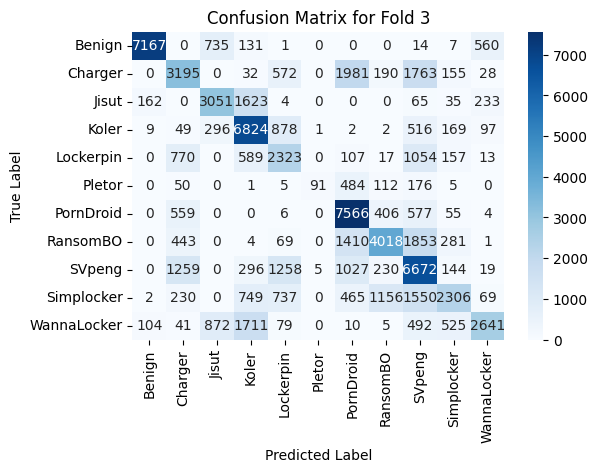

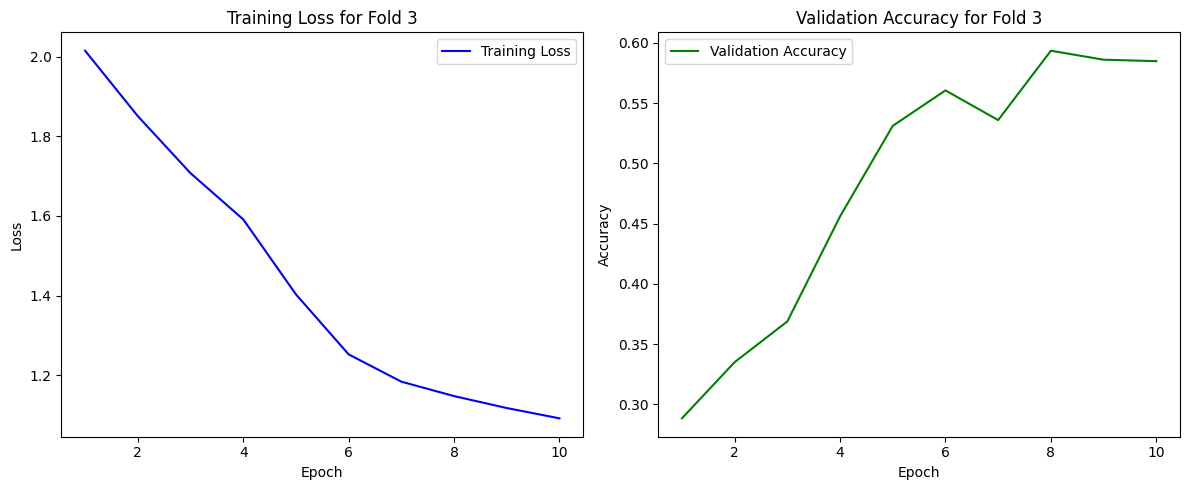


Fold 4
Epoch 1/10 - Loss: 1.8977 - Validation Accuracy: 0.3055
Epoch 2/10 - Loss: 1.7461 - Validation Accuracy: 0.3660
Epoch 3/10 - Loss: 1.4809 - Validation Accuracy: 0.4797
Epoch 4/10 - Loss: 1.3112 - Validation Accuracy: 0.5380
Epoch 5/10 - Loss: 1.2301 - Validation Accuracy: 0.5529
Epoch 6/10 - Loss: 1.1896 - Validation Accuracy: 0.5331
Epoch 7/10 - Loss: 1.1526 - Validation Accuracy: 0.5481
Epoch 8/10 - Loss: 1.1246 - Validation Accuracy: 0.5713
Epoch 9/10 - Loss: 1.1048 - Validation Accuracy: 0.5781
Epoch 10/10 - Loss: 1.0746 - Validation Accuracy: 0.6017
Accuracy for fold 4: 60.17%
F1 Score for fold 4: 0.5938
Confusion Matrix:
[[7849    0  210   19    0    0    0    0    0    0  545]
 [   0 2851    0  138  676   20 1389  428 1955  246  100]
 [1068    0 2943  423    0    0    0    0    3    0  762]
 [ 102    4  556 6704  356    2    0    0  236   17  954]
 [   9  604    6  990 2136    3   35   20  945   63  229]
 [   0   88    0    5    8  342  272   59  130    9   11]
 [   0  6

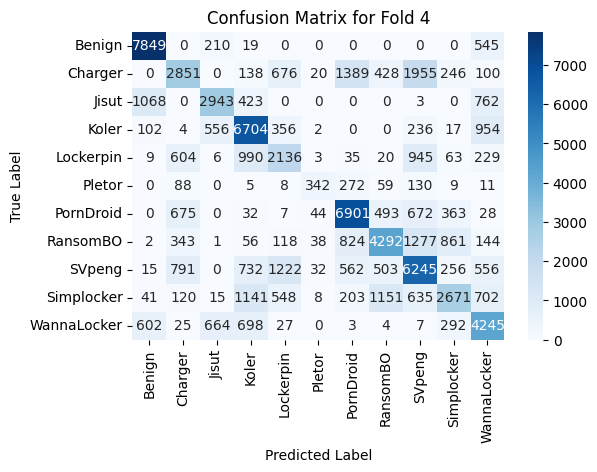

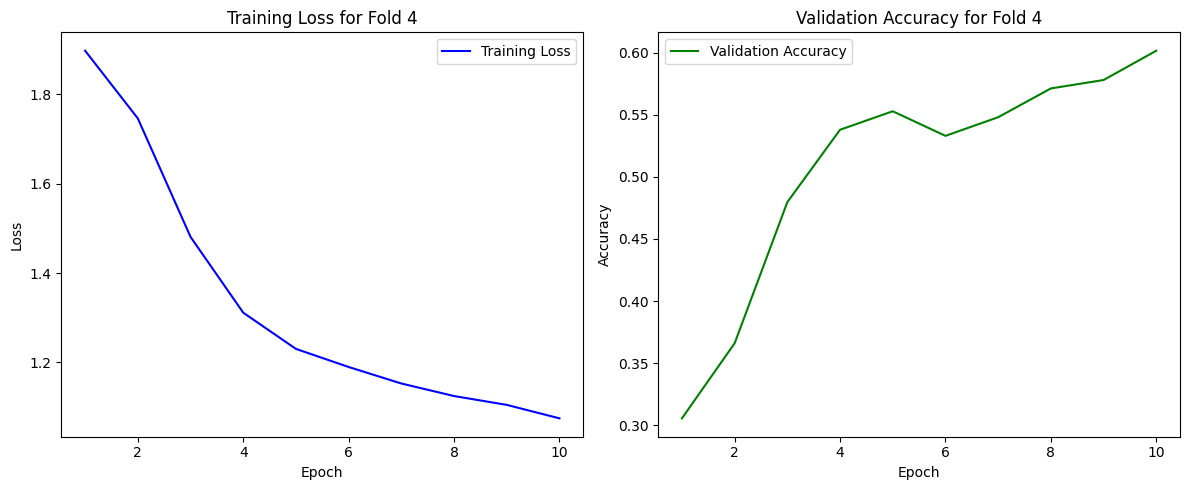


Fold 5
Epoch 1/10 - Loss: 2.3099 - Validation Accuracy: 0.1414
Epoch 2/10 - Loss: 2.3071 - Validation Accuracy: 0.1378
Epoch 3/10 - Loss: 2.3165 - Validation Accuracy: 0.1377
Epoch 4/10 - Loss: 2.3168 - Validation Accuracy: 0.1377
Epoch 5/10 - Loss: 2.3168 - Validation Accuracy: 0.1377
Epoch 6/10 - Loss: 2.3168 - Validation Accuracy: 0.1377
Epoch 7/10 - Loss: 2.3147 - Validation Accuracy: 0.1395
Epoch 8/10 - Loss: 2.2968 - Validation Accuracy: 0.1413
Epoch 9/10 - Loss: 2.2930 - Validation Accuracy: 0.1637
Epoch 10/10 - Loss: 2.2940 - Validation Accuracy: 0.1637
Accuracy for fold 5: 16.37%
F1 Score for fold 5: 0.0698
Confusion Matrix:
[[ 2476     0     0     0     0     0     0     0  6188     0     0]
 [  129     0     0     0     0     0     0     0  7845     0     0]
 [ 1198     0     0     0     0     0     0     0  3927     0     0]
 [ 1023     0     0     0     0     0     0     0  8015     0     0]
 [  207     0     0     0     0     0     0     0  4751     0     0]
 [   25     

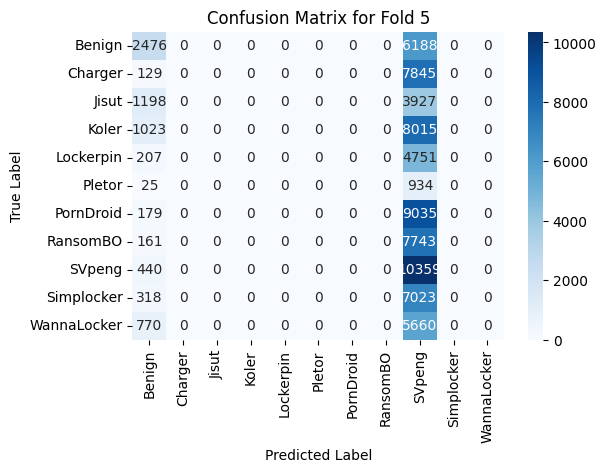

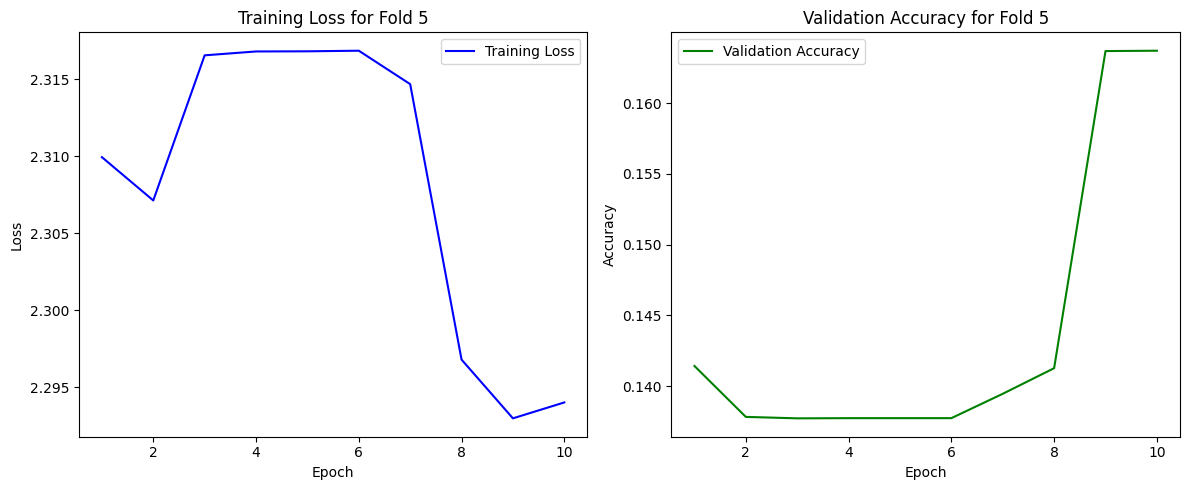


Average Accuracy: 40.41%
Average F1 Score: 0.3578


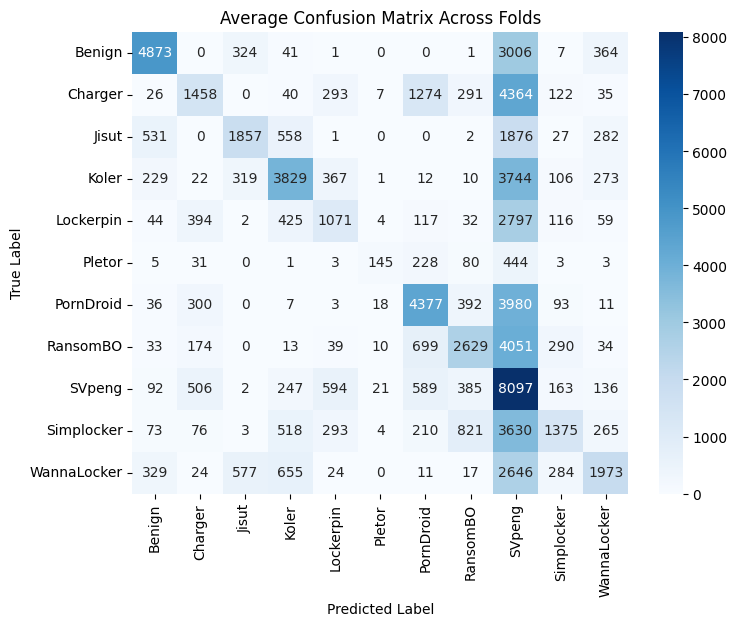

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import KFold
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Meninjau distribusi semua kolom sebelum encoding
print("Distribusi sebelum encoding:")
for col in data.select_dtypes(include=['object']):
    print(f"Kolom: {col}")
    print(data[col].value_counts())
    print("\n")

# 2. Label encoding untuk semua kolom bertipe 'object'
label_encoder = LabelEncoder()
original_labels = {}
encoded_labels = {}

for col in data.select_dtypes(include=['object']).columns:
    original_labels[col] = data[col].unique()
    data[col] = label_encoder.fit_transform(data[col])
    encoded_labels[col] = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# 3. Memastikan hasil encoding
print("Distribusi setelah encoding:")
print(data.head())

# Menampilkan mapping label
print("\nMapping label asli ke encoded:")
for col, mapping in encoded_labels.items():
    print(f"\nKolom: {col}")
    for original, encoded in mapping.items():
        print(f"Label '{original}' di-encode menjadi {encoded}")

# 4. Menentukan fitur dan target
X = data.drop('Label', axis=1)  # 'Label' adalah target
y = data['Label']

# 5. KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_accuracy = []
all_f1_scores = []
conf_matrix_list = []

# Definisikan Transformer model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2, dropout=0.1):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)

# 6. Loop untuk cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X)):
    print(f'\nFold {fold + 1}')

    # Split data menjadi training dan validation set
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train.values)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val.values)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader with larger batch size
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Initialize the model
    model = TransformerModel(input_dim=X_train_tensor.shape[1], num_classes=len(np.unique(y)))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

    # Lists for tracking metrics
    train_losses = []
    val_accuracies = []

    # Train the model
    num_epochs = 10  # Mengurangi epoch untuk demonstrasi
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Calculate average loss and accuracy
        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = correct / total
        train_losses.append(epoch_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        val_accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(val_accuracy)

        # Print loss and accuracy for each epoch
        print(f'Epoch {epoch + 1}/{num_epochs} - Loss: {epoch_loss:.4f} - Validation Accuracy: {val_accuracy:.4f}')

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred.numpy())
    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())

    # Append results for this fold
    all_accuracy.append(accuracy)
    all_f1_scores.append(f1)
    conf_matrix_list.append(conf_matrix)

    # Print metrics for current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix for current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Plotting Training and Validation Accuracy and Loss
    plt.figure(figsize=(12, 5))

    # Plot Training Loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 7. Average metrics across all folds
print(f'\nAverage Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 8. Plot the average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Average Confusion Matrix Across Folds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **2. Transformer "ENCODER" label biner**

In [ ]:
# **CLASSIFICATION Non-Tuning**

ini dirunning sendiri ya

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding
# ... (rest of your code)
# 1. Preprocessing: Label Encoding
# Initialize the LabelEncoder

# Fit the LabelEncoder to your target variable and transform it
bin_data['Label'] = le1.fit_transform(bin_data['Label'])

# Now you can access the classes_ attribute
class_names = le1.classes_  # Save the original class names

# Convert class_names to a list of strings
class_names = [str(class_name) for class_name in class_names] # convert class_names elements to string

# Cek apakah ada nilai hilang dan ganti dengan nilai yang sesuai
bin_data.fillna(0, inplace=True)  # Mengisi nilai hilang dengan 0
 # Mengisi nilai hilang dengan 0

# ... (rest of your code)
# 2. Define Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Embedding layer
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = self.embedding(x)  # Embed the input features
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)  # Pass through the transformer encoder
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# 3. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []  # List to store average train losses for plotting
average_val_accuracies = []  # List to store validation accuracies for plotting

for fold, (train_index, val_index) in enumerate(kf.split(bin_data)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train, X_val = bin_data.drop(columns=['Label']).iloc[train_index], bin_data.drop(columns=['Label']).iloc[val_index]
    y_train, y_val = bin_data['Label'].iloc[train_index], bin_data['Label'].iloc[val_index]

    # Convert to PyTorch tensors (hanya ambil kolom numerik)
    X_train_tensor = torch.FloatTensor(X_train.select_dtypes(include=np.number).values)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val.select_dtypes(include=np.number).values)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the model
    model = TransformerModel(input_dim=X_train_tensor.shape[1], num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 5  # Meningkatkan jumlah epoch
    train_losses = []  # List untuk menyimpan loss per epoch
    val_accuracies = []  # List untuk menyimpan akurasi per epoch

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=class_names)
    print(cls_report)

    # Store average loss and accuracy for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 4. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 5. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 6. Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')

# 7. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Grafik Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Grafik Akurasi
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


# 7. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Grafik Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Grafik Akurasi
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()




# **3. TRANSFORMER "FS"**

# **CLASSIFICATION Non-Tuning**

Fold 1
Accuracy for fold 1: 88.83%
F1 Score for fold 1: 0.8772
              precision    recall  f1-score   support

    abnormal       0.92      0.96      0.94     34922
      normal       0.48      0.31      0.38      4282

    accuracy                           0.89     39204
   macro avg       0.70      0.63      0.66     39204
weighted avg       0.87      0.89      0.88     39204



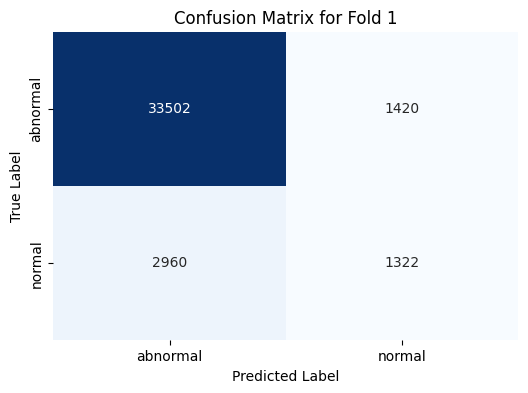

Fold 2
Accuracy for fold 2: 90.03%
F1 Score for fold 2: 0.8795
              precision    recall  f1-score   support

    abnormal       0.91      0.98      0.95     34866
      normal       0.63      0.24      0.34      4338

    accuracy                           0.90     39204
   macro avg       0.77      0.61      0.65     39204
weighted avg       0.88      0.90      0.88     39204



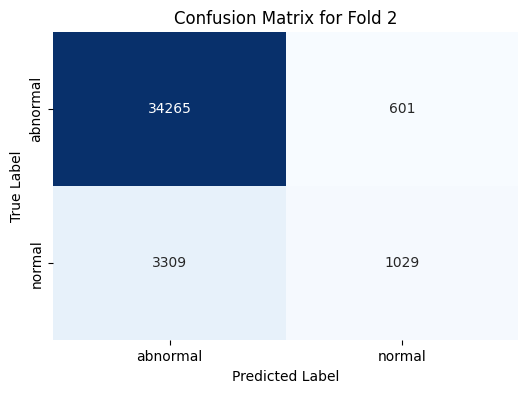

Fold 3
Accuracy for fold 3: 90.41%
F1 Score for fold 3: 0.8842
              precision    recall  f1-score   support

    abnormal       0.92      0.98      0.95     34980
      normal       0.65      0.24      0.35      4224

    accuracy                           0.90     39204
   macro avg       0.78      0.61      0.65     39204
weighted avg       0.89      0.90      0.88     39204



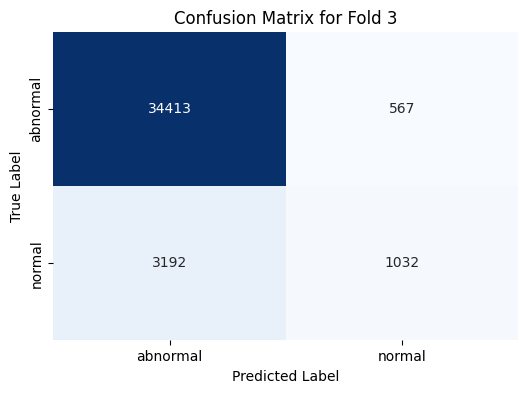

Fold 4
Accuracy for fold 4: 90.09%
F1 Score for fold 4: 0.8761
              precision    recall  f1-score   support

    abnormal       0.91      0.99      0.95     34813
      normal       0.69      0.21      0.32      4391

    accuracy                           0.90     39204
   macro avg       0.80      0.60      0.63     39204
weighted avg       0.88      0.90      0.88     39204



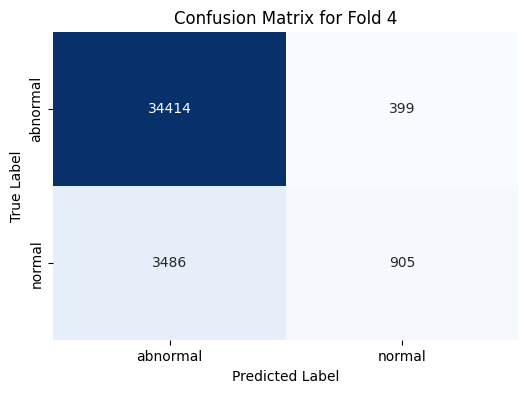

Fold 5
Accuracy for fold 5: 90.49%
F1 Score for fold 5: 0.8848
              precision    recall  f1-score   support

    abnormal       0.91      0.99      0.95     34939
      normal       0.67      0.25      0.36      4264

    accuracy                           0.90     39203
   macro avg       0.79      0.62      0.66     39203
weighted avg       0.89      0.90      0.88     39203



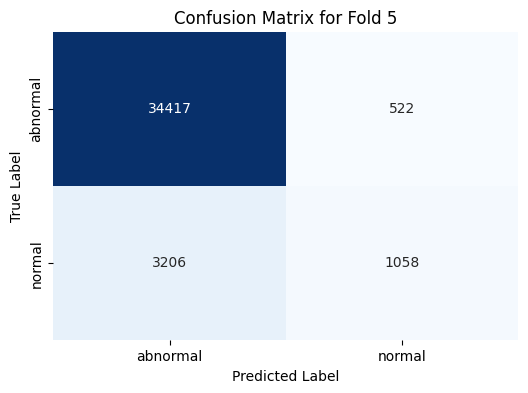

Fold 6
Accuracy for fold 6: 90.11%
F1 Score for fold 6: 0.8800
              precision    recall  f1-score   support

    abnormal       0.91      0.98      0.95     34881
      normal       0.64      0.23      0.34      4322

    accuracy                           0.90     39203
   macro avg       0.78      0.61      0.64     39203
weighted avg       0.88      0.90      0.88     39203



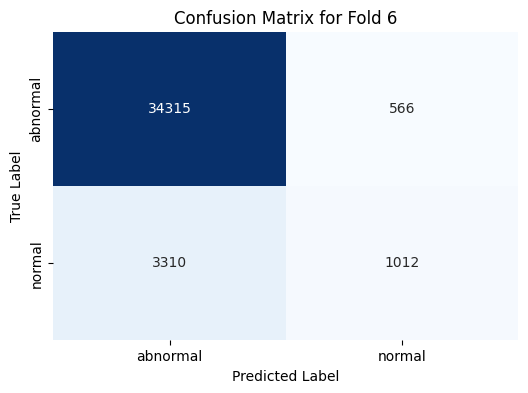

Fold 7


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding
class_names = le1.classes_  # Save the original class names

# Check for missing values and replace with appropriate values
bin_data.fillna(0, inplace=True)  # Fill missing values with 0

# 2. Define FS-Transformer Model
class FSTransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2, dropout=0.1):
        super(FSTransformerModel, self).__init__()

        # Feature embedding for feature selection
        self.feature_embedding = nn.Parameter(torch.randn(input_dim, d_model))  # Learnable embedding for each feature
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = x @ self.feature_embedding  # Apply feature selection through embedding
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)  # Pass through the transformer encoder
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# 3. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []  # List to store average train losses for plotting
average_val_accuracies = []  # List to store validation accuracies for plotting

for fold, (train_index, val_index) in enumerate(kf.split(bin_data)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train, X_val = bin_data.drop(columns=['Label']).iloc[train_index], bin_data.drop(columns=['Label']).iloc[val_index]
    y_train, y_val = bin_data['Label'].iloc[train_index], bin_data['Label'].iloc[val_index]

    # Convert to PyTorch tensors (only numeric columns)
    X_train_tensor = torch.FloatTensor(X_train.select_dtypes(include=np.number).values)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val.select_dtypes(include=np.number).values)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the FS-Transformer model
    model = FSTransformerModel(input_dim=X_train_tensor.shape[1], num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 5  # Increase the number of epochs if needed
    train_losses = []  # List to store loss per epoch
    val_accuracies = []  # List to store accuracy per epoch

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=class_names)
    print(cls_report)

    # Store average loss and accuracy for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 4. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 5. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 6. Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')

# 7. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


# **Hyperparameter Tuning**

In [ ]:
import itertools
# Define the hyperparameters grid
param_grid = {
    'lr': [0.001, 0.0005],
    'batch_size': [16, 32],
    'nhead': [2, 4]
}

# Track the best model
best_accuracy = 0
best_params = None

# Loop over all combinations of hyperparameters
for lr, batch_size, nhead in itertools.product(param_grid['lr'],
                                               param_grid['batch_size'],
                                               param_grid['nhead']):
    print(f'Training with lr={lr}, batch_size={batch_size}, nhead={nhead}')

    # Reinitialize model with new hyperparameters, ensuring consistent d_model
    # ***CHANGE*** Use X_train_tensor.shape[1] for input_dim
    model = FSTransformerModel(input_dim=X_train_tensor.shape[1],
                             num_classes=len(class_names),
                             d_model=128, nhead=nhead, num_layers=3, dropout=0.3)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    # DataLoader with the new batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Train for 2 epochs (for quick demonstration)
    for epoch in range(2):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Validate and calculate accuracy
    model.eval()
    with torch.no_grad():
        y_pred_probs = model(X_val_tensor)
        _, y_pred = torch.max(y_pred_probs, 1)
        accuracy = accuracy_score(y_val, y_pred.numpy())

    print(f'Validation Accuracy: {accuracy * 100:.2f}%')

    # Save best parameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'lr': lr, 'batch_size': batch_size, 'nhead': nhead}

print(f'Best Params: {best_params} with Accuracy: {best_accuracy * 100:.2f}%')


# **CLASSIFICATION With Hyperparameter Tuning**
(ganti parameter sesuai yang terbaik hasil hyperparameter tuning ya)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding
class_names = le1.classes_  # Save the original class names

# Check for missing values and replace with appropriate values
bin_data.fillna(0, inplace=True)  # Fill missing values with 0

# 2. Define FS-Transformer Model
class FSTransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2, dropout=0.1):
        super(FSTransformerModel, self).__init__()

        # Feature embedding for feature selection
        self.feature_embedding = nn.Parameter(torch.randn(input_dim, d_model))  # Learnable embedding for each feature
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = x @ self.feature_embedding  # Apply feature selection through embedding
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)  # Pass through the transformer encoder
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# 3. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []  # List to store average train losses for plotting
average_val_accuracies = []  # List to store validation accuracies for plotting

for fold, (train_index, val_index) in enumerate(kf.split(bin_data)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train, X_val = bin_data.drop(columns=['label']).iloc[train_index], bin_data.drop(columns=['label']).iloc[val_index]
    y_train, y_val = bin_data['label'].iloc[train_index], bin_data['label'].iloc[val_index]

    # Convert to PyTorch tensors (only numeric columns)
    X_train_tensor = torch.FloatTensor(X_train.select_dtypes(include=np.number).values)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val.select_dtypes(include=np.number).values)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the FS-Transformer model
    model = FSTransformerModel(input_dim=X_train_tensor.shape[1], num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 2  # Increase the number of epochs if needed
    train_losses = []  # List to store loss per epoch
    val_accuracies = []  # List to store accuracy per epoch

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=class_names)
    print(cls_report)

    # Store average loss and accuracy for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 4. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 5. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 6. Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')

# 7. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


Fold 1


KeyboardInterrupt: 